In [1]:
import matplotlib as mpl

mpl.use('Agg')

from matplotlib import pylab as plt
from astropy.io import fits
import ogip
import ogip.core

In [2]:
# oda:version "v0.1.28"

focus_obs_name='total'
sampler_steps=50


In [3]:
# Parameters
focus_obs_name = "total"


In [4]:
from astropy.time import Time
T0_isot = "2023-03-07T15:44:07"
T0_ijd = Time(T0_isot, scale='utc').tt.mjd - 51544


* Subject: 	Re: GRB221009A
* Date: 	Fri, 28 Oct 2022 17:37:00 +0200
* From: 	ejourdain <ejourdain@irap.omp.eu>
* To: 	Volodymyr Savchenko [UNIGE] <Volodymyr.Savchenko@unige.ch>
* CC: 	Jean-Pierre Roques <jroques@irap.omp.eu>, Carlo Ferrigno <carlo.ferrigno@unige.ch>


The spectrum in attachement is averaged over rev 2558 and 2559. Adding rev 2560 decreases the signal to noise ratio (which is not high anyway)

The two broad channels below and above 551 keV may be used to test scenarii with broad shifted annihilation feature if relevant.


 


In [5]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

# focus_obs_name='r25589'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb230307/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

In [6]:
import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

-rw-rw-r-- 1 savchenk  6500160 Mär  9 12:01 grbbase_fitspack_total/isgri_total_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx1_total_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx2_total_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  6500160 Mär  9 12:01 grbbase_fitspack_total/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  6500160 Mär  9 12:01 grbbase_fitspack_total/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    14400 Mär  9 12:01 grbbase_fitspack_total/JMX1_lc_GRB_230307A.fits
-rw-rw-r-- 1 savchenk    14400 Mär  9 12:01 grbbase_fitspack_total/JMX2_lc_GRB_230307A.fits
-rw-rw-r-- 1 savchenk    17280 Mär  9 12:01 grbbase_fitspack_total/IBIS_lc_GRB_230307A.fits
-rw-rw-r-- 1 savchenk    17280 Mär  9 12:01 grbbase_fitspack_total/JMX1_arf_GRB_230307A_total.fits
-rw-rw-r--

In [7]:
source_name_slug = "GRB_230307A"

!ls -lotr grbbase_fitspack_{focus_obs_name}/*

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_{source_name_slug}_{focus_obs_name}.fits")
jmx1_pha

-rw-rw-r-- 1 savchenk  6500160 Mär  9 12:01 grbbase_fitspack_total/isgri_total_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx1_total_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx2_total_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 30741120 Mär  9 12:01 grbbase_fitspack_total/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  6500160 Mär  9 12:01 grbbase_fitspack_total/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  6500160 Mär  9 12:01 grbbase_fitspack_total/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    14400 Mär  9 12:01 grbbase_fitspack_total/JMX1_lc_GRB_230307A.fits
-rw-rw-r-- 1 savchenk    14400 Mär  9 12:01 grbbase_fitspack_total/JMX2_lc_GRB_230307A.fits
-rw-rw-r-- 1 savchenk    17280 Mär  9 12:01 grbbase_fitspack_total/IBIS_lc_GRB_230307A.fits
-rw-rw-r-- 1 savchenk    17280 Mär  9 12:01 grbbase_fitspack_total/JMX1_arf_GRB_230307A_total.fits
-rw-rw-r--

In [8]:
import ogip.core

from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec


import requests

print(f"grbbase_fitspack_{focus_obs_name}/IBIS_spectrum_{source_name_slug}_{focus_obs_name}.fits")

isgri_pha = PHAI.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_spectrum_{source_name_slug}_{focus_obs_name}.fits")
isgri_rmf = RMF.from_file_name(f"grbbase_fitspack_{focus_obs_name}/IBIS_rmf_{source_name_slug}_{focus_obs_name}.fits")

jmx1_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_spectrum_{source_name_slug}_{focus_obs_name}.fits")
jmx1_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_rmf_{source_name_slug}_{focus_obs_name}.fits")
jmx1_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/JMX1_arf_{source_name_slug}_{focus_obs_name}.fits")

jmx2_pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_spectrum_{source_name_slug}_{focus_obs_name}.fits")
jmx2_rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_rmf_{source_name_slug}_{focus_obs_name}.fits")
jmx2_arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}//JMX2_arf_{source_name_slug}_{focus_obs_name}.fits")


from astropy.time import Time

ijd2isot = lambda ijd: Time(ijd + 51544, format='mjd').isot
spec2isot12 = lambda spec: (ijd2isot(fits.open(spec.filename)[1].header['TSTART']), ijd2isot(fits.open(spec.filename)[1].header['TSTOP']))

spec2isot12(jmx1_pha), spec2isot12(isgri_pha)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


grbbase_fitspack_total/IBIS_spectrum_GRB_230307A_total.fits


(('2023-03-08T10:36:40.003', '2023-03-09T02:57:36.038'),
 ('2023-03-08T10:36:40.003', '2023-03-09T04:09:41.041'))

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -223.21413286183275
        x: [ 8.454e-08 -2.000e+00]
      nit: 3
      jac: [ 4.082e+01  0.000e+00]
     nfev: 51
     njev: 17
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
(50, 2) 2


  0%|                                                                                                                                                                  | 0/50 [00:00<?, ?it/s]

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


  2%|███                                                                                                                                                       | 1/50 [00:00<00:13,  3.73it/s]

  4%|██████▏                                                                                                                                                   | 2/50 [00:00<00:13,  3.64it/s]

  6%|█████████▏                                                                                                                                                | 3/50 [00:00<00:13,  3.49it/s]

  8%|████████████▎                                                                                                                                             | 4/50 [00:01<00:12,  3.76it/s]

 10%|███████████████▍                                                                                                                                          | 5/50 [00:01<00:11,  3.81it/s]

 12%|██████████████████▍                                                                                                                                       | 6/50 [00:01<00:11,  3.75it/s]

 14%|█████████████████████▌                                                                                                                                    | 7/50 [00:01<00:11,  3.67it/s]

 16%|████████████████████████▋                                                                                                                                 | 8/50 [00:02<00:11,  3.66it/s]

 18%|███████████████████████████▋                                                                                                                              | 9/50 [00:02<00:11,  3.68it/s]

 20%|██████████████████████████████▌                                                                                                                          | 10/50 [00:02<00:10,  3.87it/s]

 22%|█████████████████████████████████▋                                                                                                                       | 11/50 [00:02<00:09,  3.98it/s]

 24%|████████████████████████████████████▋                                                                                                                    | 12/50 [00:03<00:09,  4.04it/s]

 26%|███████████████████████████████████████▊                                                                                                                 | 13/50 [00:03<00:08,  4.23it/s]

 28%|██████████████████████████████████████████▊                                                                                                              | 14/50 [00:03<00:09,  3.97it/s]

 30%|█████████████████████████████████████████████▉                                                                                                           | 15/50 [00:03<00:08,  3.90it/s]

 32%|████████████████████████████████████████████████▉                                                                                                        | 16/50 [00:04<00:08,  4.03it/s]

 34%|████████████████████████████████████████████████████                                                                                                     | 17/50 [00:04<00:07,  4.13it/s]

 36%|███████████████████████████████████████████████████████                                                                                                  | 18/50 [00:04<00:07,  4.25it/s]

 38%|██████████████████████████████████████████████████████████▏                                                                                              | 19/50 [00:04<00:07,  4.13it/s]

 40%|█████████████████████████████████████████████████████████████▏                                                                                           | 20/50 [00:05<00:06,  4.32it/s]

 42%|████████████████████████████████████████████████████████████████▎                                                                                        | 21/50 [00:05<00:06,  4.42it/s]

 44%|███████████████████████████████████████████████████████████████████▎                                                                                     | 22/50 [00:05<00:06,  4.39it/s]

 46%|██████████████████████████████████████████████████████████████████████▍                                                                                  | 23/50 [00:05<00:06,  4.38it/s]

 48%|█████████████████████████████████████████████████████████████████████████▍                                                                               | 24/50 [00:05<00:05,  4.37it/s]

 50%|████████████████████████████████████████████████████████████████████████████▌                                                                            | 25/50 [00:06<00:05,  4.28it/s]

 52%|███████████████████████████████████████████████████████████████████████████████▌                                                                         | 26/50 [00:06<00:05,  4.32it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████▌                                                                      | 27/50 [00:06<00:05,  4.44it/s]

 56%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 28/50 [00:06<00:04,  4.41it/s]

 58%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 29/50 [00:07<00:04,  4.47it/s]

 60%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 30/50 [00:07<00:04,  4.43it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 31/50 [00:07<00:04,  4.39it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 32/50 [00:07<00:04,  4.33it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 33/50 [00:08<00:03,  4.27it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 34/50 [00:08<00:03,  4.48it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 35/50 [00:08<00:03,  4.37it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 36/50 [00:08<00:03,  4.52it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 37/50 [00:08<00:02,  4.48it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 38/50 [00:09<00:02,  4.36it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 39/50 [00:09<00:02,  4.34it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 40/50 [00:09<00:02,  4.36it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 41/50 [00:09<00:02,  4.49it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 42/50 [00:10<00:01,  4.57it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 43/50 [00:10<00:01,  4.69it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 44/50 [00:10<00:01,  4.50it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 45/50 [00:10<00:01,  4.50it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 46/50 [00:10<00:00,  4.65it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 47/50 [00:11<00:00,  4.83it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 48/50 [00:11<00:00,  4.97it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 49/50 [00:11<00:00,  4.85it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.80it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.28it/s]

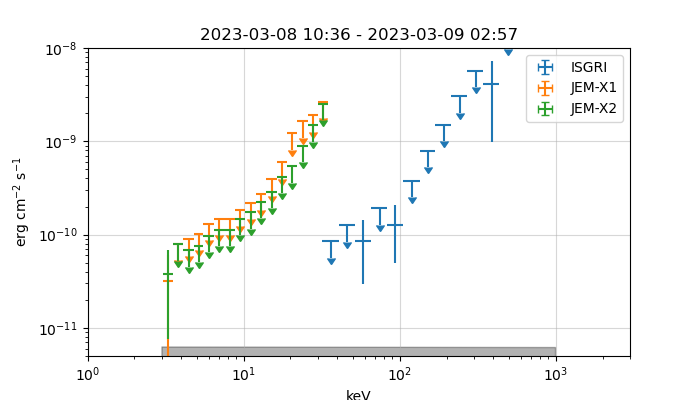

In [9]:
import ogip.tools

import importlib
importlib.reload(ogip.tools)
from astropy import units as u


from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec



# isgri_pha = PHAI.from_file_name("IBIS_spectrum_GRB221009A.fits")
# isgri_rmf = RMF.from_file_name("IBIS_rmf_GRB221009A.fits")

isgri_pha_rebinned, isgri_rmf_rebinned = rebin(isgri_pha, isgri_rmf, log_bins(10, 25, 700))


model = lambda x:(7e-5*(x/25.)**-2)

import logging
logger = logging.getLogger()

def model_generator(p):
    logger.debug("generating model for %s", p)

    def mdl(x):
        logger.debug("evaluating model for %s", p)
        if len(p) == 1:
            return (p[0]*(x/25.)**-2)
        else:
            return (p[0]*(x/25.)**p[1])

    return mdl

def model_with_pars(x, p):    
    logger.debug("evaluating model for %s", p)
    if len(p) == 1:
        return (1e-7*p[0]*(x/25.)**-2)
    else:
        return (1e-7*p[0]*(x/25.)**p[1])

allspec = [
    (jmx1_pha, jmx1_rmf, jmx1_arf, (jmx1_rmf._e_min > 2) & (jmx1_rmf._e_min < 15)),
    (jmx2_pha, jmx2_rmf, jmx2_arf, (jmx2_rmf._e_min > 2) & (jmx2_rmf._e_min < 15)),
    (isgri_pha, isgri_rmf, None, (isgri_rmf._e_min > 28) & (isgri_rmf._e_min < 200)),
]

import numpy as np

# fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-5, -1.9], jmx1_pha, jmx1_rmf, None, 
#                                           mask=(jmx1_rmf._e_min > 5) & (jmx1_rmf._e_min < 20))

# model_generator = lambda p:(lambda x:(p[0]*(x/25.)**-2))
# fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-10], isgri_pha, isgri_rmf, None, 
#                                           mask=(isgri_rmf._e_min > 35) & (isgri_rmf._e_min < 100))


# model_generator = lambda p:(lambda x:(p[0]*(x/25.)**-2))
fit_result, fitted_model = ogip.tools.fit(model_generator, [1e-9, -2], 
                                          allspec,
                                        #   method='L-BFGS-B'
                                          method='L-BFGS-B'
                                          )

print(fit_result)        


p0 = [1e-9, -2]

f0 = np.log10(fit_result.x[0])


    
# r = ogip.tools.sample(model_with_pars, p0=[(f0, -300, 300)], spectra=allspec, nsteps=sampler_steps, nwalkers=50, n_processes=1)
r = ogip.tools.sample(model_with_pars, p0=[(f0, -1000, 1000), (-2, -2.01, -1.99)], spectra=allspec, nsteps=sampler_steps, nwalkers=50, n_processes=1)

tau = r.get_autocorr_time(tol=1)

flat_samples = r.get_chain(discard=int(max(tau))*2, thin=15, flat=True)

p_best = r.flatchain[np.argmax(r.flatlnprobability)]
fitted_model = lambda x:model_with_pars(x, p_best)

model = fitted_model                                        

for unfolded in True, False:
# for unfolded in False,:
    f = plt.figure(figsize=(7, 4))

    
# for unfolded in False, :
    e_power = 2 if unfolded else 0

    en = np.logspace(np.log10(3), 3)
    models = []
    for p in flat_samples[::10]:
        models.append(model_with_pars(en, p))
    models = np.array(models)

    plt.fill_between(
        en,
        *(np.percentile(models, (5, 95), axis=0)*en**2*u.keV.to(u.erg)),
        alpha=0.3,
        color='k'        
    )


    plt.plot(en, fitted_model(en)*en**2*u.keV.to(u.erg), lw=3, c='k', alpha=0.5, ls="--")

    from astropy import units as u
    erg_in_keV = u.keV.to(u.erg)

    # plot_spec(isgri_pha, model, isgri_rmf, fig=f, label_prefix="ISGRI", unfolded=unfolded, e_power=e_power)
    plot_spec(isgri_pha_rebinned, model, isgri_rmf_rebinned, fig=f, unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV,
            plot_kwargs=dict(label="ISGRI"))

    isgri_pha_rebinned.to_fits("isgri_rebinned_pha.fits")
    isgri_rmf_rebinned.to_fits("isgri_rebinned_rmf.fits")

    # plot_spec(spi_pha_rebinned, model, spi_rmf_rebinned, fig=f, label_prefix="SPI", unfolded=unfolded, e_power=e_power)

            
    plot_spec(jmx1_pha, model, jmx1_rmf, arf=jmx1_arf, fig=f, unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV, 
            plot_kwargs=dict(label="JEM-X1"))
    plot_spec(jmx2_pha, model, jmx2_rmf, arf=jmx2_arf, fig=f, label_prefix="JMX2", unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV,
            plot_kwargs=dict(label="JEM-X2"))

    if 'r25589' in focus_obs_name:
        plot_spec(spi_pha, model, spi_rmf, fig=f, plot_kwargs=dict(label="SPI"), unfolded=unfolded, e_power=e_power, scale_factor=erg_in_keV)
    
    # early and total jemxX spec are weird

    if unfolded:
        plt.ylabel(f"erg cm$^{{-2}}$ s$^{{-1}}$" + (f" keV$^{{{e_power-2}}}$" if e_power!=2 else ""))
    else:
        plt.ylabel("counts/s/keV")

    plt.xlabel("keV")

    plt.xlim([1, 3e3])
    plt.ylim([5e-12, 1e-8])
    # plt.loglog()

    plt.grid(alpha=0.5)

    # plt.title(f"{focus_obs_name} {spec2isot12(jmx1_pha)}\n {spec2isot12(isgri_pha)} {fit_result.x} {fitted_model}")
    t1, t2 = spec2isot12(jmx1_pha)
    t2pl = lambda t:t.replace("T", " ")[:16]
    plt.title(f"{t2pl(t1)} - {t2pl(t2)}")

    plt.legend()




    fn_png = f"spec_afterglow_counts_{'un' if unfolded else ''}folded.png"
    plt.savefig(fn_png.replace(".png", ".pdf"))
    plt.savefig(fn_png)


from IPython.display import Image
Image("spec_afterglow_counts_unfolded.png")
# Image("spec_afterglow_counts_folded.png")

    # TODO: add in grey other data
    # TODO: plot by period

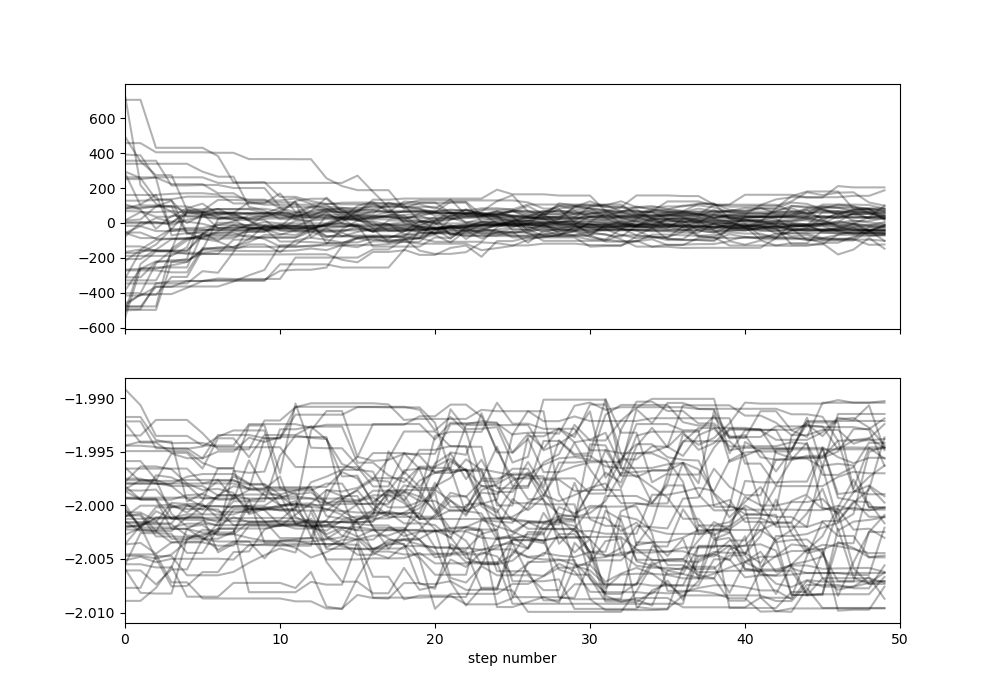

In [10]:
importlib.reload(ogip.tools)
ogip.tools.plot_chain(r)
plt.savefig("chain.png")
Image("chain.png")

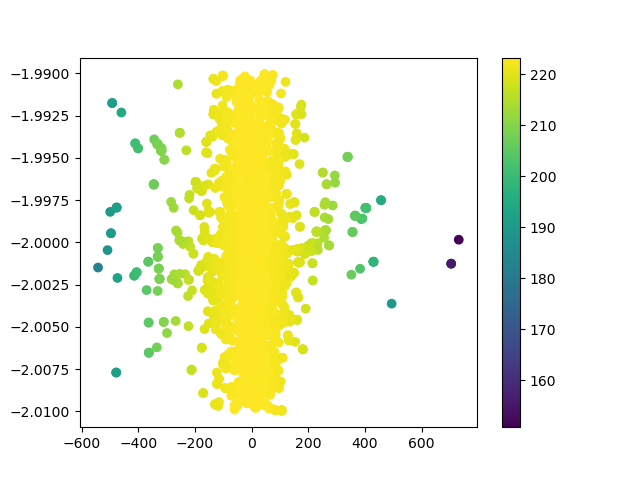

In [11]:
plt.figure()

m = r.flatlnprobability > -500

plt.scatter(
    r.flatchain[m,0],
    r.flatchain[m,1],
    c=r.flatlnprobability[m]
)

plt.colorbar()

plt.savefig("corner.png")
Image("corner.png")


In [12]:
# "karmen problem" makes bayesian not work with UL https://s3.cern.ch/inspire-prod-files-c/c9cf50e940c651021325686d6ce9212d

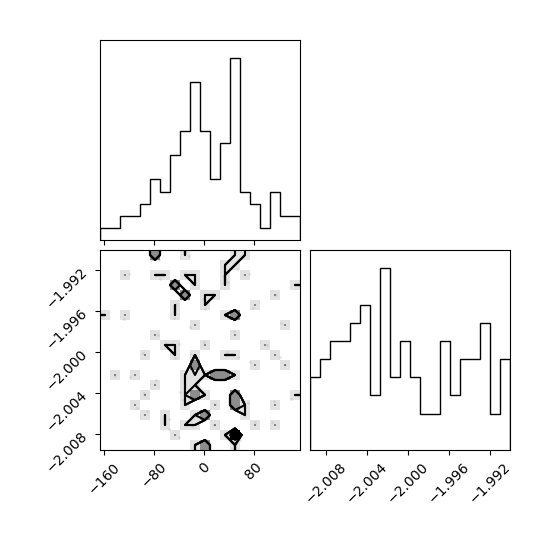

In [13]:
from corner import corner

corner(flat_samples)
plt.savefig("corner.png")
Image("corner.png")

In [14]:
from scipy.integrate import quad

def flux_for_pars(p, e1=3, e2=200):
    return quad(lambda x:model_with_pars(x, p)*x*u.keV.to(u.erg), e1, e2)[0]

fluxes = [flux_for_pars(p) for p in flat_samples]
peak = flux_for_pars(r.flatchain[np.argmax(r.flatlnprobability)])

flux_3_200_keV_ecs = {
    'mean': peak,
    'stat_err_minus': peak - np.percentile(fluxes, 5),
    'stat_err_plus': - peak + np.percentile(fluxes, 95),
}

flux_3_200_keV_ecs 

{'mean': 6.222600890082792e-13,
 'stat_err_minus': 4.6001549241261836e-11,
 'stat_err_plus': 4.823225514015698e-11}

In [15]:
fit_pars = {}

for n, m, p in zip(["N", "slope"], np.mean(flat_samples, axis=0), np.percentile(flat_samples, (5, 95), axis=0).transpose()):
    print(n, m, p)
    fit_pars[n] = {
        'mean': m,
        'stat_err_minus': m - p[0],
        'stat_err_plus': - m + p[1],
    }

fit_pars

N 2.7756114999963857 [-107.89284355  116.18021043]
slope -2.0003898189541274 [-2.0082632  -1.99183142]


{'N': {'mean': 2.7756114999963857,
  'stat_err_minus': 110.66845504687687,
  'stat_err_plus': 113.40459893497952},
 'slope': {'mean': -2.0003898189541274,
  'stat_err_minus': 0.007873381369559507,
  'stat_err_plus': 0.008558402958855016}}

In [16]:
tl = ["t1_isot", "t2_isot"]

tl_isot = dict(
    jmx1_time_range = dict(zip(tl, spec2isot12(jmx1_pha))),
    jmx2_time_range = dict(zip(tl, spec2isot12(jmx2_pha))),
    isgri_time_range = dict(zip(tl, spec2isot12(isgri_pha))),
)


In [17]:
sn_max = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn = 0 # np.max(d['RATE'] / d['STAT_ERR'])
sn_total = 0 # np.sum(d['RATE']) / np.sum(d['STAT_ERR']**2)**0.5
exposure = 0 # spec[2].header['EXPOSURE']
ag_spec="spec_afterglow_counts_unfolded.pdf"
flux_3_200_keV_ecs=flux_3_200_keV_ecs
fit_pars=fit_pars
time_range = tl_isot

In [18]:

import papermill as pm
import scrapbook as sb
import base64
import json
import hashlib
import os
    
from nb2workflow.nbadapter import denumpyfy
from nb2workflow.json import CustomJSONEncoder


try:
    sb.glue("sn_max",denumpyfy(sn_max))
except Exception as e:
    print("failed to glue sn_max", sn_max)
    print("will glue jsonified")
    sb.glue("sn_max",json.dumps(denumpyfy(sn_max), cls=CustomJSONEncoder))

if isinstance(sn_max,str) and os.path.exists(sn_max):
    variable_name = "sn_max"
    fn = sn_max
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("sn_max_url", url)


try:
    sb.glue("sn",denumpyfy(sn))
except Exception as e:
    print("failed to glue sn", sn)
    print("will glue jsonified")
    sb.glue("sn",json.dumps(denumpyfy(sn), cls=CustomJSONEncoder))

if isinstance(sn,str) and os.path.exists(sn):
    variable_name = "sn"
    fn = sn
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("sn_url", url)


try:
    sb.glue("sn_total",denumpyfy(sn_total))
except Exception as e:
    print("failed to glue sn_total", sn_total)
    print("will glue jsonified")
    sb.glue("sn_total",json.dumps(denumpyfy(sn_total), cls=CustomJSONEncoder))

if isinstance(sn_total,str) and os.path.exists(sn_total):
    variable_name = "sn_total"
    fn = sn_total
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("sn_total_url", url)


try:
    sb.glue("exposure",denumpyfy(exposure))
except Exception as e:
    print("failed to glue exposure", exposure)
    print("will glue jsonified")
    sb.glue("exposure",json.dumps(denumpyfy(exposure), cls=CustomJSONEncoder))

if isinstance(exposure,str) and os.path.exists(exposure):
    variable_name = "exposure"
    fn = exposure
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("exposure_url", url)


try:
    sb.glue("ag_spec",denumpyfy(ag_spec))
except Exception as e:
    print("failed to glue ag_spec", ag_spec)
    print("will glue jsonified")
    sb.glue("ag_spec",json.dumps(denumpyfy(ag_spec), cls=CustomJSONEncoder))

if isinstance(ag_spec,str) and os.path.exists(ag_spec):
    variable_name = "ag_spec"
    fn = ag_spec
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("ag_spec_url", url)


try:
    sb.glue("flux_3_200_keV_ecs",denumpyfy(flux_3_200_keV_ecs))
except Exception as e:
    print("failed to glue flux_3_200_keV_ecs", flux_3_200_keV_ecs)
    print("will glue jsonified")
    sb.glue("flux_3_200_keV_ecs",json.dumps(denumpyfy(flux_3_200_keV_ecs), cls=CustomJSONEncoder))

if isinstance(flux_3_200_keV_ecs,str) and os.path.exists(flux_3_200_keV_ecs):
    variable_name = "flux_3_200_keV_ecs"
    fn = flux_3_200_keV_ecs
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("flux_3_200_keV_ecs_url", url)


try:
    sb.glue("fit_pars",denumpyfy(fit_pars))
except Exception as e:
    print("failed to glue fit_pars", fit_pars)
    print("will glue jsonified")
    sb.glue("fit_pars",json.dumps(denumpyfy(fit_pars), cls=CustomJSONEncoder))

if isinstance(fit_pars,str) and os.path.exists(fit_pars):
    variable_name = "fit_pars"
    fn = fit_pars
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("fit_pars_url", url)


try:
    sb.glue("time_range",denumpyfy(time_range))
except Exception as e:
    print("failed to glue time_range", time_range)
    print("will glue jsonified")
    sb.glue("time_range",json.dumps(denumpyfy(time_range), cls=CustomJSONEncoder))

if isinstance(time_range,str) and os.path.exists(time_range):
    variable_name = "time_range"
    fn = time_range
    content = open(fn ,'rb').read()    

    if 1048576 is None or len(content) < 1048576:
        encoded = base64.b64encode(content).decode()
        print("glueing file", fn)
        sb.glue(variable_name + "_content", encoded)
    else:
        # TODO: make a customizable upload to different DL platforms; before that it should be enabled with caution    
        os.makedirs("/tmp/nb2w-store", exist_ok=True)
        url = "file:///tmp/nb2w-store/" + str(hashlib.md5(content).hexdigest())
        print("storing file to URL", url)
        with open(url.replace("file://", ""), "wb") as f:
            f.write(content)

        sb.glue("time_range_url", url)



<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:105: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:132: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:213: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:105: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:132: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:213: SyntaxWarning: "is" with a literal. Did you mean "=="

/tmp/ipykernel_2026377/3809078755.py:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


/tmp/ipykernel_2026377/3809078755.py:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


/tmp/ipykernel_2026377/3809078755.py:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


/tmp/ipykernel_2026377/3809078755.py:105: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


glueing file spec_afterglow_counts_unfolded.pdf


/tmp/ipykernel_2026377/3809078755.py:132: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


/tmp/ipykernel_2026377/3809078755.py:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


/tmp/ipykernel_2026377/3809078755.py:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:


/tmp/ipykernel_2026377/3809078755.py:213: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 1048576 is None or len(content) < 1048576:
